# Description of the Dataset

The California Housing Dataset

The data contains information from the 1990 California census. The following section describes each feature:

There are 10 attributes in the dataset. They are:

longitude - A measure of how far west a house is; a higher value is farther west

latitude - A measure of how far north a house is; a higher value is farther north

housing_median_age - Median age of a house within a block; a lower number is a newer building

total_rooms - Total number of rooms within a block

total_bedrooms - Total number of bedrooms within a block

population - Total number of people residing within a block

households - Total number of households, a group of people residing within a home unit, for a block

median_income - Median income for households within a block of houses (measured in tens of thousands of US Dollars)

median_house_value - Median house value for households within a block (measured in US Dollars)  - Target Variable

ocean_proximity - Location of the house w.r.t ocean/sea

Dataset Source: https://www.kaggle.com/datasets/shibumohapatra/house-price/data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [132]:
# loading dataset
df = pd.read_csv(r"/Users/shahbaz/Documents/Dissertation/HPP/california_new.csv")

In [133]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# EDA

In [134]:
#Checking the shape of the dataset

df.shape

(20640, 10)

In [135]:
#printing list of columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [136]:
# checking data types of all columns

print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object


The data type of all attributes is float64 and int except the column "ocean_proximity" which contains categorical data.

In [137]:
# checking missing values
df.isnull().sum() 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only 1 attribute have missing value i.e "total_bedrooms"

In [138]:
#summary statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Key insights:

Count (20640): This means there are twenty-six thousand six hundred forty data points for each variable in our dataset and no missing values.

Mean: The average value of every column, this is 206,855.82 dollars which indicate the average price of the house in this data.

Standard Deviation (std): This indicates how much variation or dispersion from the mean. For example, we can tell that median_house_value has a variety of prices since it has a standard deviation of $115395.62.

Minimum (min): This is the smallest number from all columns. Hence, according to median_house_value minimum value is $14,999 meaning that there are homes with low costs in this dataset.

25th Percentile (25%): It shows the demarcation below which 25% of the points lies, for instance 25% houses have median_house_value < $119600.

Median (50% / 50th Percentile): The middle most value when data is sorted; e.g., housing_median_age has a median value of 29 years hence half of the houses are older than twenty-nine years while the other half are younger than twenty-nine years old.

75th Percentile (75%): This is just maximum numbers from all columns-the highest possible limit for them; also known as capped values. According to above results maximum price was $500001 for median_house_value which looks like probably a ceiling on prices in this dataset; thus it can be taken as an outlier.

housing_median_age: This housing_median_age ranges from 1 to 52 years with a median age of 29, which implies that the houses are not all new.

Statistics on Rooms and Population: The number of rooms range, number of bedrooms, population, and households are not uniform suggesting some small as well as large households in the data set.

House Values and Income: The median_income is highly variable (mean = 3.87) with likely figures being in tens of thousands of dollars, while median_house_value ranges greatly pointing to differences in income levels and house values.

In [139]:
# for ocean_proximity

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

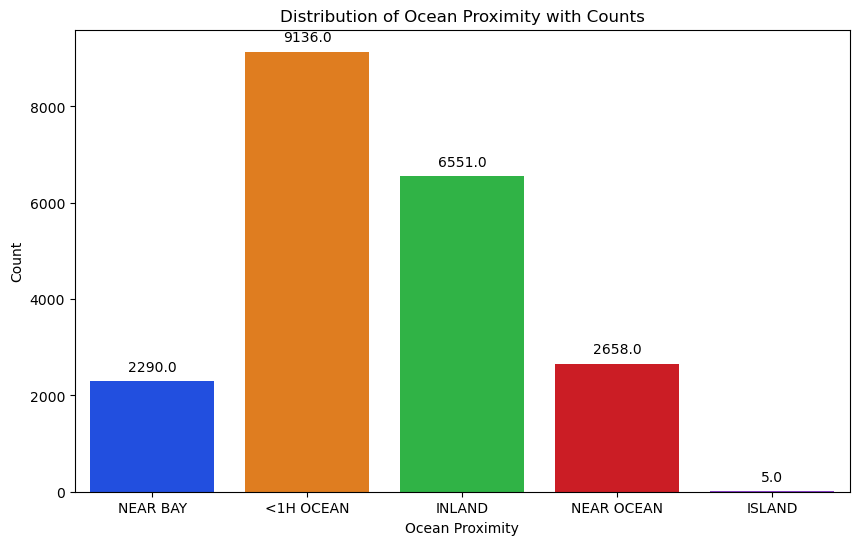

In [140]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='ocean_proximity', palette='bright')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Ocean Proximity with Counts')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

plt.show()

Concentration Around the Ocean: The majority of the data points are concentrated in the <1H OCEAN and INLAND categories. This indicates that most of the properties are either close to the ocean or located inland, with fewer properties near the bay or on an island.

Rare Island Properties: The very small number of island properties suggests that houses on island are expensive.

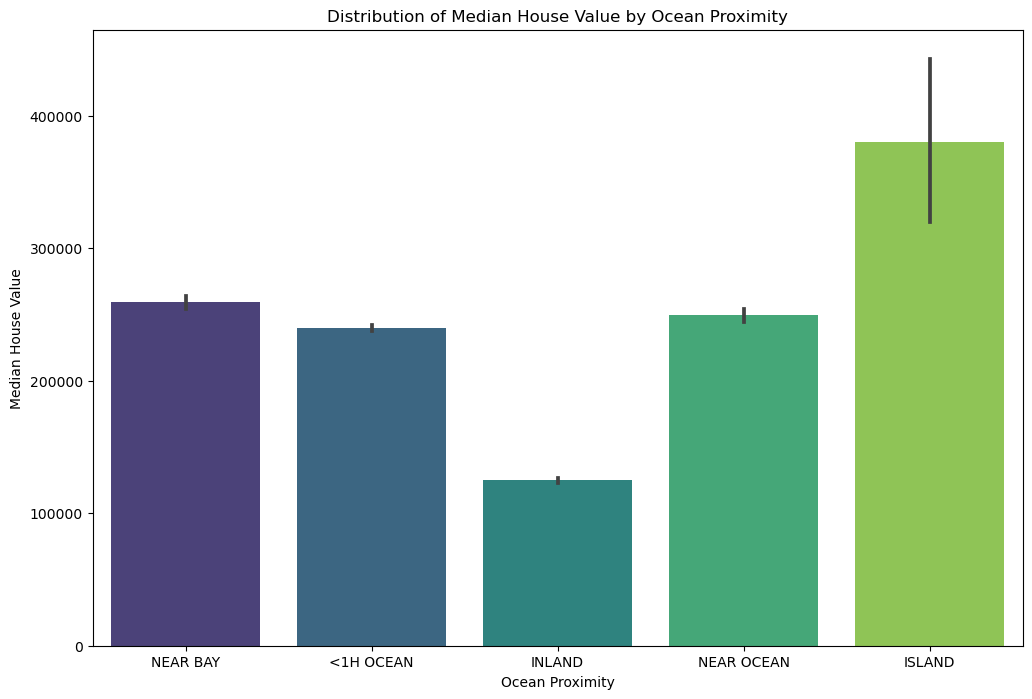

In [141]:
# Visualizing the distribution of median house value by ocean proximity
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette='viridis')

plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')

plt.show()

ISLAND: The median house value for ISLAND stands at almost $450,000, which is the highest of all categories. This category exhibits a higher mean house value variability or uncertainty as indicated by the long error bar above.

NEAR BAY and <1H OCEAN: There are approximately 300,000 dollars in median house prices for both these categories. Data inconsistency is minimal shown by the tiny error bars.

NEAR OCEAN: NEAR BAY and <1H OCEAN have slightly higher median house values as compared to this category at roughly $275,000.

INLAND: The INLAND group has a small error bar and thus a low data variability; hence its lowest average home prices of about $150,000.

On ISLAND locations houses tend to have their medians significantly higher than other categories which could be due to island properties being at a premium price rate.

INLAND properties with the least median home values are probably less attractive because they are located far from the ocean. Except for INLAND, proximity to sea seems generally to increase median housing prices.

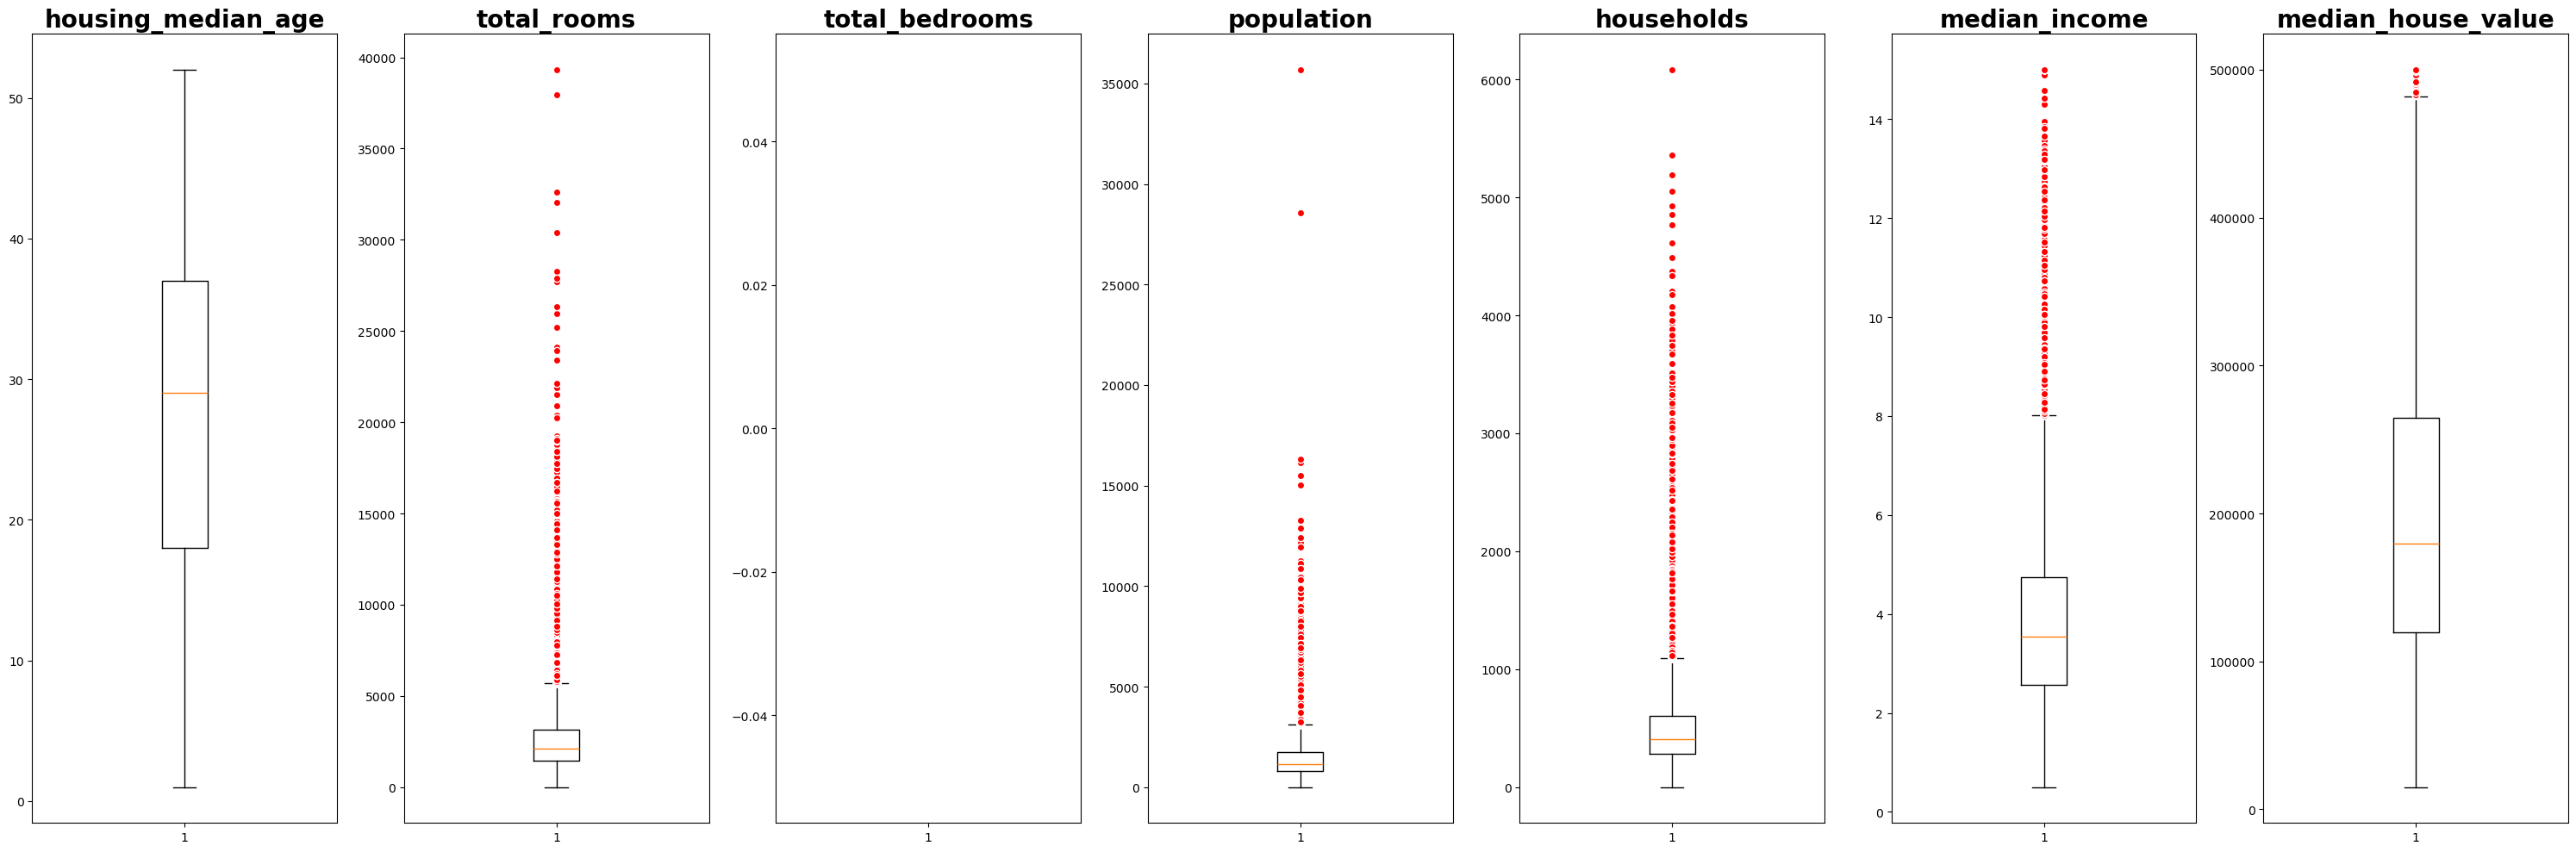

In [142]:
#boxplot to check outliers
selected_columns = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df_selected = df[selected_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(ncols=len(selected_columns), nrows=1, figsize=(30, 10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_selected.iloc[:, i], flierprops=red_circle)
    ax.set_title(df_selected.columns[i], fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


Creating a boxplot of the columns, we can see outliers in features, such as total_rooms, total_bedrooms, population, households, and median_income. 
Outliers are usually part of the data in real estate since there are features related to luxury houses, unique locations, or great renovations. Because they might represent important real phenomena, it is very well possible. We will keep it at this point with the outliers present to build our model, and when we face accuracy issues, we can consider removing it later.

## Handling Outliers by identifying and removing them

In [143]:
# Dict to store the count of outliers for each column
outliers_count = {}


print(f"Original data shape: {df.shape}")

#  creting loop through each selected column to identify and remove outliers
for column in selected_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count the outliers
    outliers_count[column] = len(outliers)
    
    # Remove outliers from the DataFrame
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

# Printing no. of outliers for each column
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")

print(f"Data shape after removing outliers: {df.shape}")

Original data shape: (20640, 10)
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 556 outliers
population: 483 outliers
households: 180 outliers
median_income: 594 outliers
median_house_value: 638 outliers
Data shape after removing outliers: (16902, 10)


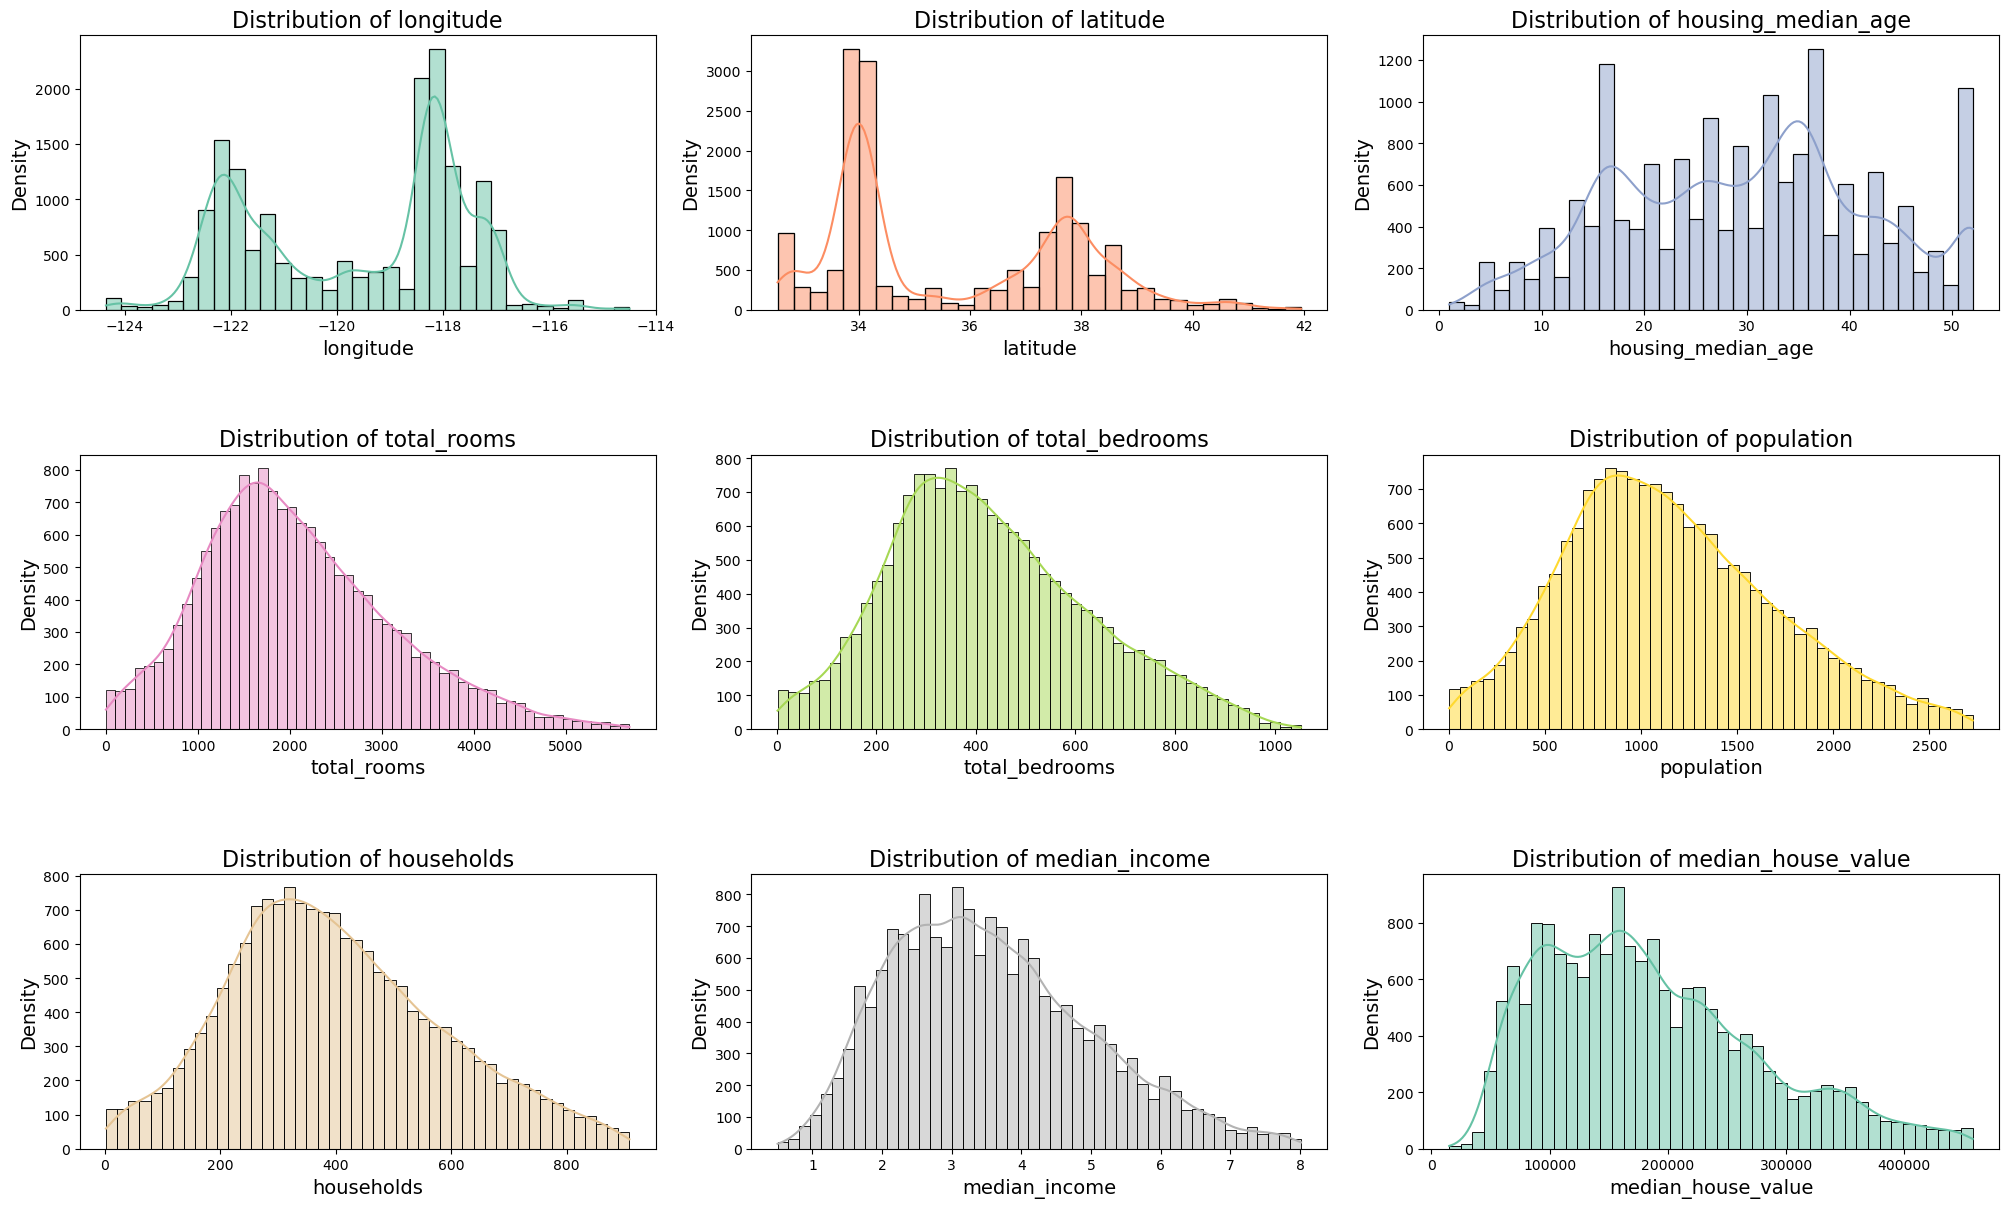

In [144]:
selected_columns = df.drop('ocean_proximity', axis = 1)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 12))
axs = axs.flatten()

# colours for different columns
colors = sns.color_palette('Set2', len(selected_columns))

for index, (col, color) in enumerate(zip(selected_columns, colors)):
    sns.histplot(df[col], kde=True, ax=axs[index], color=color)
    axs[index].set_title(f'Distribution of {col}', fontsize=16)
    axs[index].set_xlabel(col, fontsize=14)
    axs[index].set_ylabel('Density', fontsize=14)

#Adjust layout to prevent overlap
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()

The dataset shows that most of the numerical variables have considerable skewness, especially total_rooms, total_bedrooms, population, and households— this indicates a large percentage of small-sized homes and communities. The distributions for median_house_value and median_income suggest the availability of values over a wide range with higher concentrations in the lower-middle income and house value range. The geographic data(longitude and latitude) show clustering based on specific regions in California. 

longitude, latitude, and housing_median_age look to have bimodal distributions

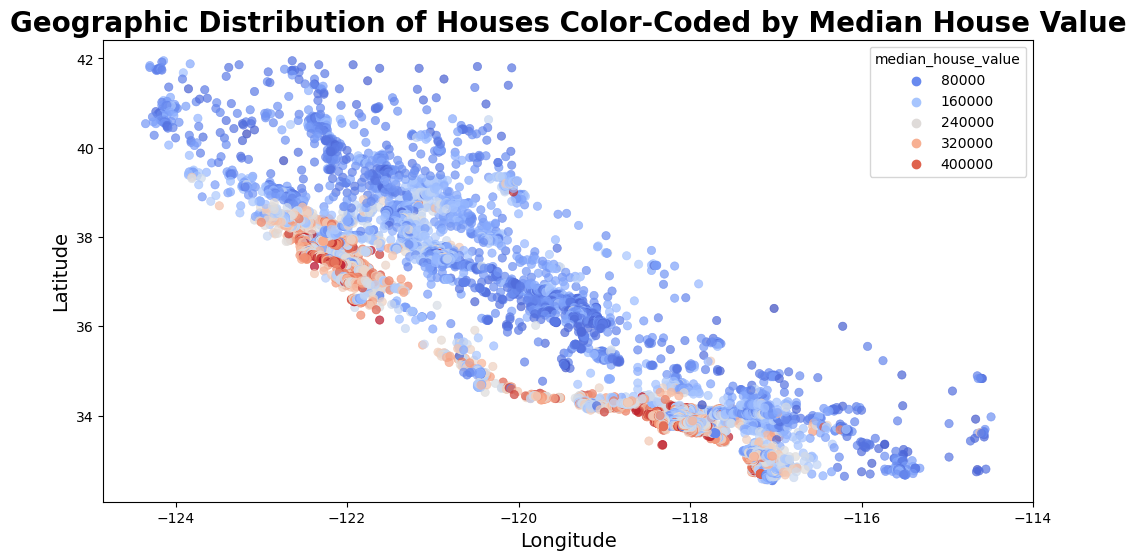

In [145]:
# Scatter plot for long and lat

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.7, edgecolor=None)

plt.title('Geographic Distribution of Houses Color-Coded by Median House Value', fontsize=20, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

This graph shows the distribution of houses across California, with each point representing a house and its colour indicating the median house value.

Blue Dots: Represent homes with lower median values (100,000 to 200,000) or less expensive houses. These are the most common type of housing unit and are found throughout most of the state, especially in rural or inland areas.

Red Dots: Stand for more expensive homes (up to $500,000 on average). These are concentrated heavily in certain parts of the state, likely close to major urban centres or along desirable coastal regions such as around the San Francisco Bay Area or parts of Southern California.

Value Distribution: The variation in house values reveals... where coastal and urban areas (darker red colours) tend to have higher house prices while more inland and less populated areas have lower house prices (lighter blue).

In [146]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200


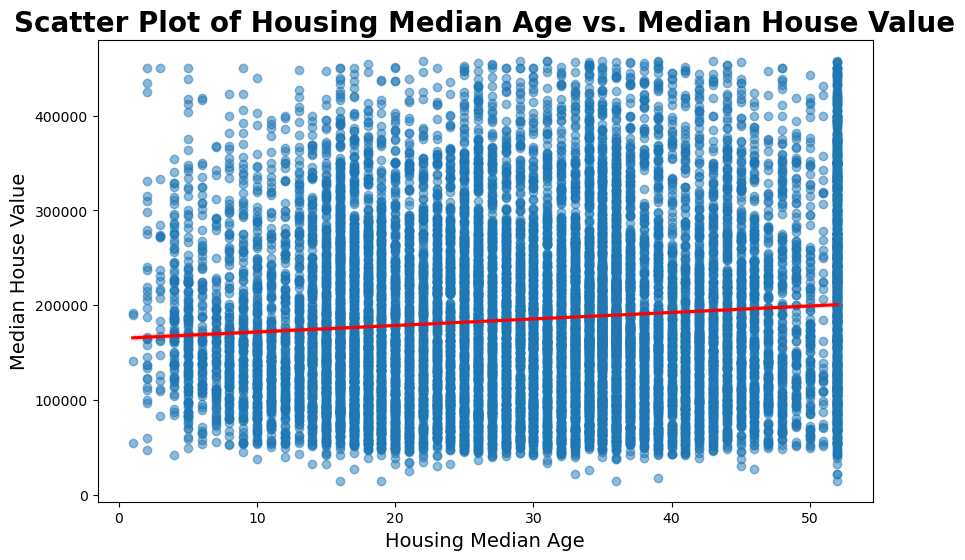

In [147]:
#scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='housing_median_age', y='median_house_value', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Housing Median Age vs. Median House Value', fontsize=20, fontweight='bold')
plt.xlabel('Housing Median Age', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.show()

The red regression line has a slight upward tilt, so there is a weak positive relationship between housing median age and median house value. This means that typically, older houses have somewhat higher values (as shown by the higher median age) but it is not a strong relationship.

In [148]:
#Step 1: Create Income Segments

income_bins = [0, 2, 4, 6, 8, df['median_income'].max()]
income_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Creating a new column 'income_segment' in the df
df['income_segment'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels, include_lowest=True)

In [149]:
#Step 2: Group by Income Segments

# Calculate mean median_house_value and population for each income segment
income_grouped = df.groupby('income_segment').agg({
    'median_house_value': 'mean',
    'population': 'mean'
}).reset_index()

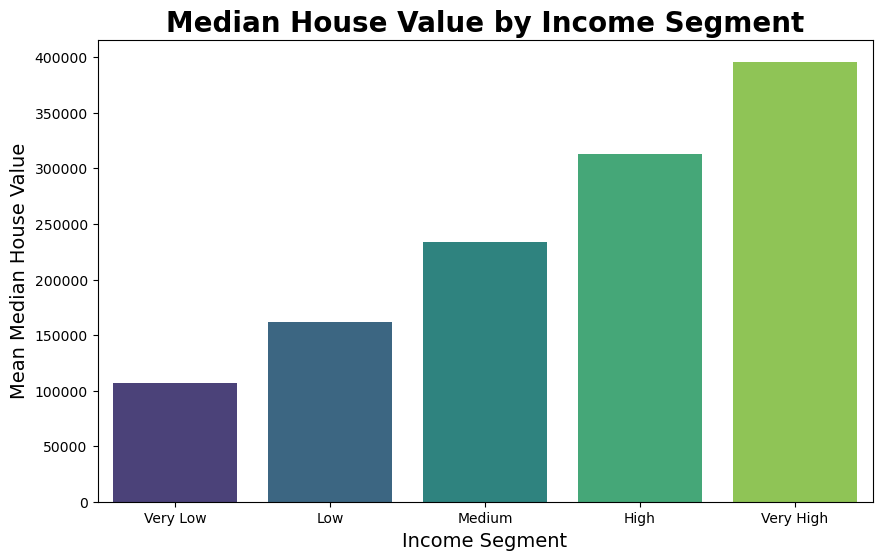

In [150]:
# Plotting Median House Value by Income Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='income_segment', y='median_house_value', data=income_grouped, palette='viridis')
plt.title('Median House Value by Income Segment', fontsize=20, fontweight='bold')
plt.xlabel('Income Segment', fontsize=14)
plt.ylabel('Mean Median House Value', fontsize=14)
plt.show()

The plot clearly indicates a positive correlation between income levels and median house values. As household income increases, the average value of the houses in those segments also rises significantly. This trend suggests that wealthier segments of the population live in more expensive homes, which is consistent with general economic expectations., exceeding $400,000.

<Axes: >

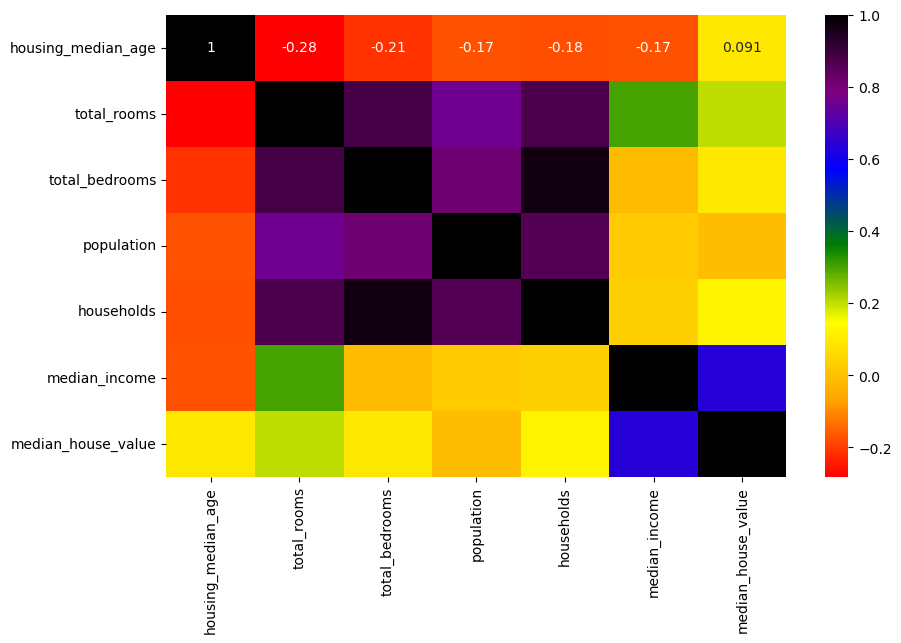

In [151]:

selected_cols = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
input_data = df[selected_cols]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["red", "orange", "yellow", "green", "blue", "purple", "black"])
plt.figure(figsize=(10,6))


sns.heatmap(input_data.corr(), annot=True, cmap=custom_cmap)

About total_bedrooms, total_rooms have a very strong positive correlation (0.93), implying that houses with more rooms will have more bedrooms.

The number of households increases population at a high rate of 0.91 this is because the household number upsurges in an area which increases individuals residing there.

Median_income and median_house_value have a low positive relationship where areas with higher incomes are more likely to have expensive house prices.

Housing_median_age was related negatively with total_rooms (-0.36) showing that older houses sometimes were smaller in size.

However, there is a weak negative relationship between housing_median_age and median_income (-0.12), indicating that old homes can be found in low-income places sometimes.

# Data preprocessing 

In [152]:
# Imputing using simple-imputer with pipeline
pipeline = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean'))
])

df['total_bedrooms'] = pipeline.fit_transform(df[['total_bedrooms']])

In [153]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_segment
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,High
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,Medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,Low
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700,Medium
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200,Low


# One Hot encoding

In [154]:
df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='o_p', drop_first=True)


One-Hot Encoding: This method is often safer for non-ordinal categorical data, as it avoids introducing any false ordinal relationships. Each category is treated independently.

In [155]:
#dropping the "income_segment" because it was only for visualization purpose.

df = df.drop(columns=['income_segment'])

## Splitting data into train and test

In [156]:
X = df.drop(columns=['median_house_value'])  
y = df['median_house_value']  # target variable

In [157]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# shape of the data after train-test split

print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(13521, 12) (3381, 12) (13521,) (3381,)


In [159]:
# Standardize the Data
scaler = StandardScaler()

In [160]:
# Fit the scaler on the training data & transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [161]:
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

y_train_pred = model_1.predict(X_train_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error on train data: {train_mse}")
print(f"Root Mean Squared Error on train data: {train_rmse}")
print(f"R-squared on train data: {train_r2}")


y_test_pred = model_1.predict(X_test_scaled)

#Evaluating
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on test data: {test_mse}")
print(f"Root Mean Squared Error on test data: {test_rmse}")
print(f"R-squared on test data: {test_r2}")

Mean Squared Error on train data: 3104329676.8802867
Root Mean Squared Error on train data: 55716.51170775398
R-squared on train data: 0.6295725783006278
Mean Squared Error on test data: 3366186176.51467
Root Mean Squared Error on test data: 58018.843288320306
R-squared on test data: 0.6170569637190008


MSE is high on both the training and testing sets because of that the model does not accurately capture the relationship between the independent features and the target variable. Although our model is capturing 62% variance which means there is a moderate amount of fit between predicted and actual house prices.

## checking for linear regression assumptions

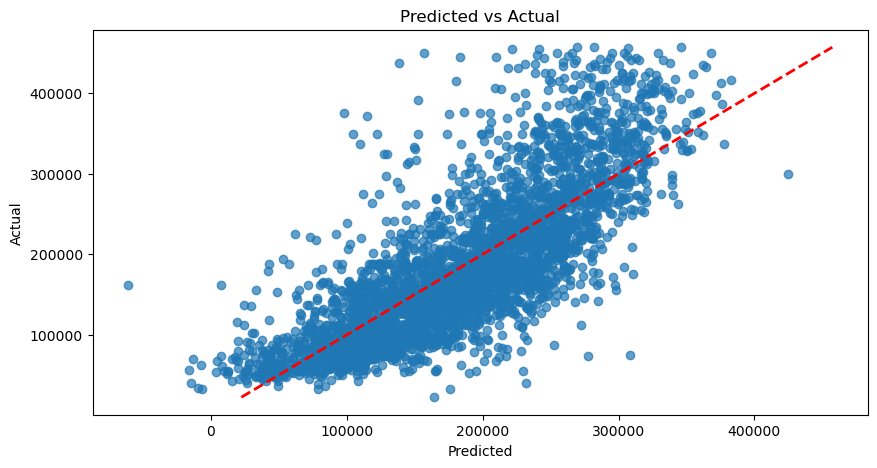

In [162]:
# 1.Linearity

residuals = y_test - y_test_pred   # residuals

plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, y_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

The scatter plot is indicating generally a linear relationship as most of the points lie along the red line, as the actual price increases data points tend to spread out and even flatten at the top. 

This suggests that the model is not perfectly capturing relationships at higher values.

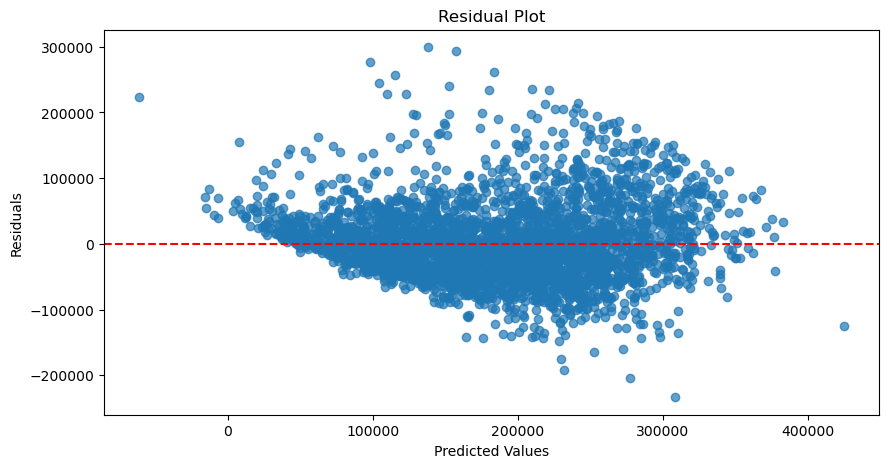

In [163]:
# 2. Homoscedasticity 
plt.figure(figsize=(10, 5))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

As we can see our graph it is a funnel type and errors are not evenly spread which voilates the assumption of Homoscedasticity and the above graph is of heteroscedasticity.

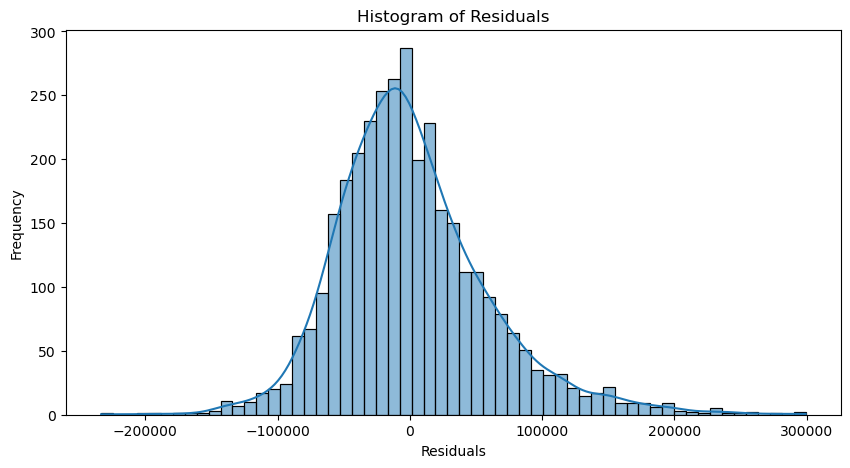

In [164]:
# 3. Normality of Residuals 

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

here we can see slightly right skewed but most errors are normally distributed so normality assumption is valid.

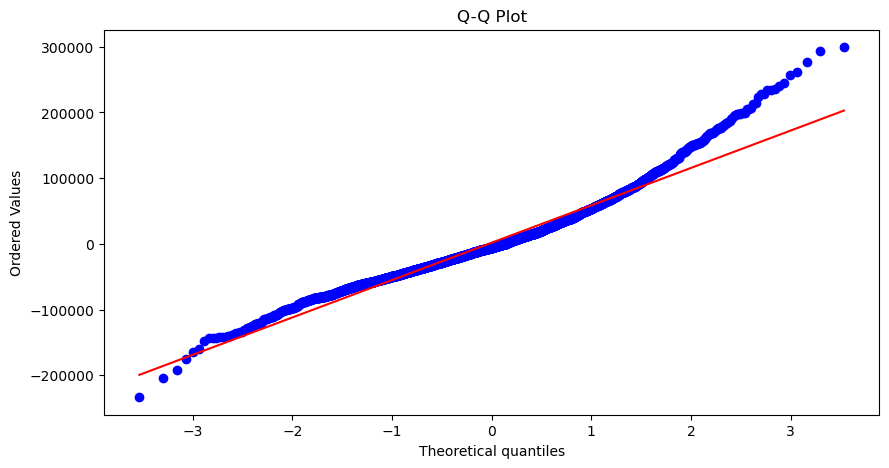

In [165]:
# Q-Q Plot for normality check
plt.figure(figsize=(10, 5))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [166]:
# 4. Independence of Errors (Durbin-Watson Test)
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')

Durbin-Watson test statistic: 1.9922625519243635


Durbin-Watson test is used to detect Autocorrelation(Independence of Errors) which ranges from 0 to 4. 

A value of 1.99.0 indicates there is little to no autocorrelation detected in the sample. 
Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 mean negative autocorrelation.

In [167]:
# 5. checking for multicollinearity
independent_variables = df.select_dtypes(include=['number']) #error fixed 

# Calculating the VIF for each independentvariable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_variables.columns
vif_data["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

print(vif_data)

             Variable         VIF
0           longitude  698.667025
1            latitude  595.871944
2  housing_median_age    8.413267
3         total_rooms   46.832373
4      total_bedrooms   98.100919
5          population   24.138307
6          households  104.216039
7       median_income   23.091509
8  median_house_value   11.159731


The VIF values that we have calculated show very high Multicollinearity in our dataset.

longitude and latitude indicate extreme multicollinearity because these two variables are highly correlated with each other as they both represent geographical locations.

total_rooms, total_bedrooms and households are also showing high Multicollinearity because they are showing or measuring similar aspects of a house.

population and median income show moderate to high multicollinearity.

housing_median_age, o_p_INLAND, o_p_ISLAND, o_p_NEAR BAY and o_p_NEAR OCEAN, these features have lower vif values which indicates that they are less correlated with each other in the dataset.

### Till Now:

Our linear regression model performed poorly on both training and testing data and several factors could be contributing to this outcome.

1. Outliers: outliers are present in our data due to this our features are skewed and have bi-model distribution and this is impacting the performance of the linear regression model.

2. Multicollinearity: Multicollinearity among the features leads to inflated standard errors of the coefficient. This makes it difficult for the model to correctly identify the true relationship between independent features and the target variable.

3. Heteroscedasticity: Previously we observed that heteroscedasticity is present in our data which violates one of the key assumptions of linear regression (Homoscedasticity) that the variance of errors is not constant across all levels of independent variables.

4. Complex Relationship: If the true relationship between target and independent features is complex, then a simple linear regression model might be too simplistic to capture the underlying pattern.

### In linear regression we are facing the issue of multicollinearity so to handle that we will use Ridge regression

# Ridge regression

In [168]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value as needed
ridge_model.fit(X_train_scaled, y_train)

y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
# results
print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f},  RMSE = {test_rmse:4f}, R² = {test_r2:.4f}")

Training Data: MSE = 3104330712.8340, RMSE = 55716.521004, R² = 0.6296
Testing Data: MSE = 3366129341.9874,  RMSE = 58018.353493, R² = 0.6171


Linear and Ridge regression are giving similar results and performing poorly on data so we will use tree-based algorithms like random forest regressor and XGBRegressor or GBM which capture complex relationships between independent and target variables.

## Linear regression from scratch(using Gradient Descent)

In [169]:
def predict(X, weights):
    return np.dot(X, weights)
#RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
#R2
def compute_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

#gradient descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights
    for i in range(n_iterations):
        predictions = predict(X, weights)
        errors = predictions - y
        gradients = (2 / m) * np.dot(X.T, errors)
        weights -= learning_rate * gradients
    return weights

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
weights = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000)

y_train_pred = predict(X_train_scaled, weights)
y_test_pred = predict(X_test_scaled, weights)
rmse_train = compute_rmse(y_train, y_train_pred)
r2_train = compute_r2(y_train, y_train_pred)
rmse_test = compute_rmse(y_test, y_test_pred)
r2_test = compute_r2(y_test, y_test_pred)

print("Training RMSE:", rmse_train)
print("Training R²:", r2_train)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Training RMSE: 56114.918324560014
Training R²: 0.6242560795864603
Test RMSE: 58381.26317211061
Test R²: 0.6122578456077477


## Ridge regression from scratch(using Gradient descent)

In [170]:
def predict(X, weights):
    return np.dot(X, weights)

# RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
# R-squared
def compute_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define the Ridge Regression gradient descent function
def ridge_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, lambda_reg=1.0):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights
    for i in range(n_iterations):
        predictions = predict(X, weights)
        errors = predictions - y
        gradients = (2 / m) * (np.dot(X.T, errors) + lambda_reg * weights)  # Add regularization term
        weights -= learning_rate * gradients
    return weights

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


lambdas = [0.01, 0.1, 1, 10, 100] 
best_lambda = None
best_rmse = float('inf')

for lambda_reg in lambdas:
    weights = ridge_gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000, lambda_reg=lambda_reg)
    
    # Predict the test data
    y_test_pred = predict(X_test_scaled, weights)
    
    # Calculating RMSE for the test data
    rmse_test = compute_rmse(y_test, y_test_pred)
    
    
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_lambda = lambda_reg


final_weights = ridge_gradient_descent(X_train_scaled, y_train, learning_rate=0.01, n_iterations=1000, lambda_reg=best_lambda)

y_train_pred = predict(X_train_scaled, final_weights)
y_test_pred = predict(X_test_scaled, final_weights)
rmse_train = compute_rmse(y_train, y_train_pred)
r2_train = compute_r2(y_train, y_train_pred)
rmse_test = compute_rmse(y_test, y_test_pred)
r2_test = compute_r2(y_test, y_test_pred)

print("Best Lambda (Regularization Parameter):", best_lambda)
print("Training RMSE:", rmse_train)
print("Training R²:", r2_train)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)


Best Lambda (Regularization Parameter): 0.01
Training RMSE: 56114.92454150747
Training R²: 0.6242559963294438
Test RMSE: 58381.268714023696
Test R²: 0.612257771993944


# Random Forest Regressor

In [171]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

y_train_pred = rf_regressor.predict(X_train_scaled)
y_test_pred = rf_regressor.predict(X_test_scaled)
test_rmse = np.sqrt(test_mse)

# Calculating MSE and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Training Data: MSE = 243075898.6357, RMSE = 15590.8915, R² = 0.9710
Testing Data: MSE = 3366129341.9874, RMSE = 58018.3535, R² = 0.6171


As we can see random forest has performed well on train data but failed to generalize on test data which indicates overfitting, to reduce ovverfiting we will perform hyperparameter tuning.

### Hyperparameter tunning for random forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

rf1_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 500],            
    'max_depth': [10, 15],                  
    'min_samples_split': [10, 15,20],           
    'min_samples_leaf': [4, 6,10],              
    'max_features': ['sqrt','log2']                    
}

random_search = RandomizedSearchCV(estimator=rf1_regressor, param_distributions=param_grid, 
                                   n_iter=20, cv=5, random_state=42, n_jobs=-1, verbose=2, 
                                   scoring='neg_mean_squared_error')


random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters found: ", best_params)

# Using the best model found by randomizedsearchCV to make pred
best_rf_model = random_search.best_estimator_


y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate MSE, RMSE & R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
# Calculate MSE, RMSE & R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   7.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=500; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_

The result from hyperparameter tunning suggest that we were able reduce overfitting.

# XGB Regressor

In [173]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', 
                                 n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=6, 
                                 random_state=42)


xgb_regressor.fit(X_train_scaled, y_train)

#pred
y_train_pred = xgb_regressor.predict(X_train_scaled)
y_test_pred = xgb_regressor.predict(X_test_scaled)

# Calculate MSE, RMSE & R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_r2 = r2_score(y_train, y_train_pred)
# Calculate MSE, RMSE & R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Training Data: MSE = 1036964954.3872, RMSE = 32201.9402, R² = 0.8763
Testing Data: MSE = 1902064191.8386, RMSE = 43612.6609, R² = 0.7836


There is a slight increase in r^2 in xgboost algorithm than random forest, we can get more improvement with hyperparameter tunning.

## Hyperparameter tunning for XGB

In [174]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


param_grid = {
    'n_estimators': [400,500],       
    'learning_rate': [0.01, 0.1],    
    'max_depth': [3,5],                
    'min_child_weight': [5, 7,9],         
    'subsample': [0.7, 0.8],          
    'colsample_bytree': [0.7, 0.8],        
    'gamma': [0.1, 0.2],              
    'reg_alpha': [0.01, 0.1],           
    'reg_lambda': [1,2,3]
}


# GridSearchCV
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                   n_iter=25, cv=5, verbose=2, random_state=42, n_jobs=-1,
                                   scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_xgb_params = grid_search.best_params_
print("Best hyperparameters found: ", best_xgb_params)

best_xgb_model = grid_search.best_estimator_

y_train_pred = best_xgb_model.predict(X_train_scaled)
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculating MSE, RMSE & R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
# Calculate MSE, RMSE & R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, reg_alpha=0.1, reg_lambda=3, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=400, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, ma

The results from hyperparameter tunning for xgboost model suggest that there is small improvement in performance of model after hyperparameter tunning.

## KNN with Hyperparameter.

In [175]:
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning using GridSearchCV to find the best number of neighbors
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_n_neighbors}")

knn_regressor = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the training and testing data
y_train_pred = knn_regressor.predict(X_train_scaled)
y_test_pred = knn_regressor.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_r2 = r2_score(y_train, y_train_pred)
# Calculate MSE, RMSE, and R-squared for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Data: MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Testing Data: MSE = {test_mse:.4f}, RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Best number of neighbors: 12
Training Data: MSE = 2164688305.8074, RMSE = 46526.2110, R² = 0.7417
Testing Data: MSE = 2808438422.7690, RMSE = 52994.7018, R² = 0.6805


## Model Comparison for both train and test data, Metrics used RMSE and R².

In [176]:
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'KNN']

train_rmse = [55730.23, 55730, 30905.08, 27842.29, 45916.39]
test_rmse = [57527.378, 57526, 46363, 42208.23, 52873.65]

train_r2 = [0.62, 0.62, 0.88, 0.90, 0.7482]
test_r2 = [0.62, 0.62, 0.75, 0.796, 0.6799]

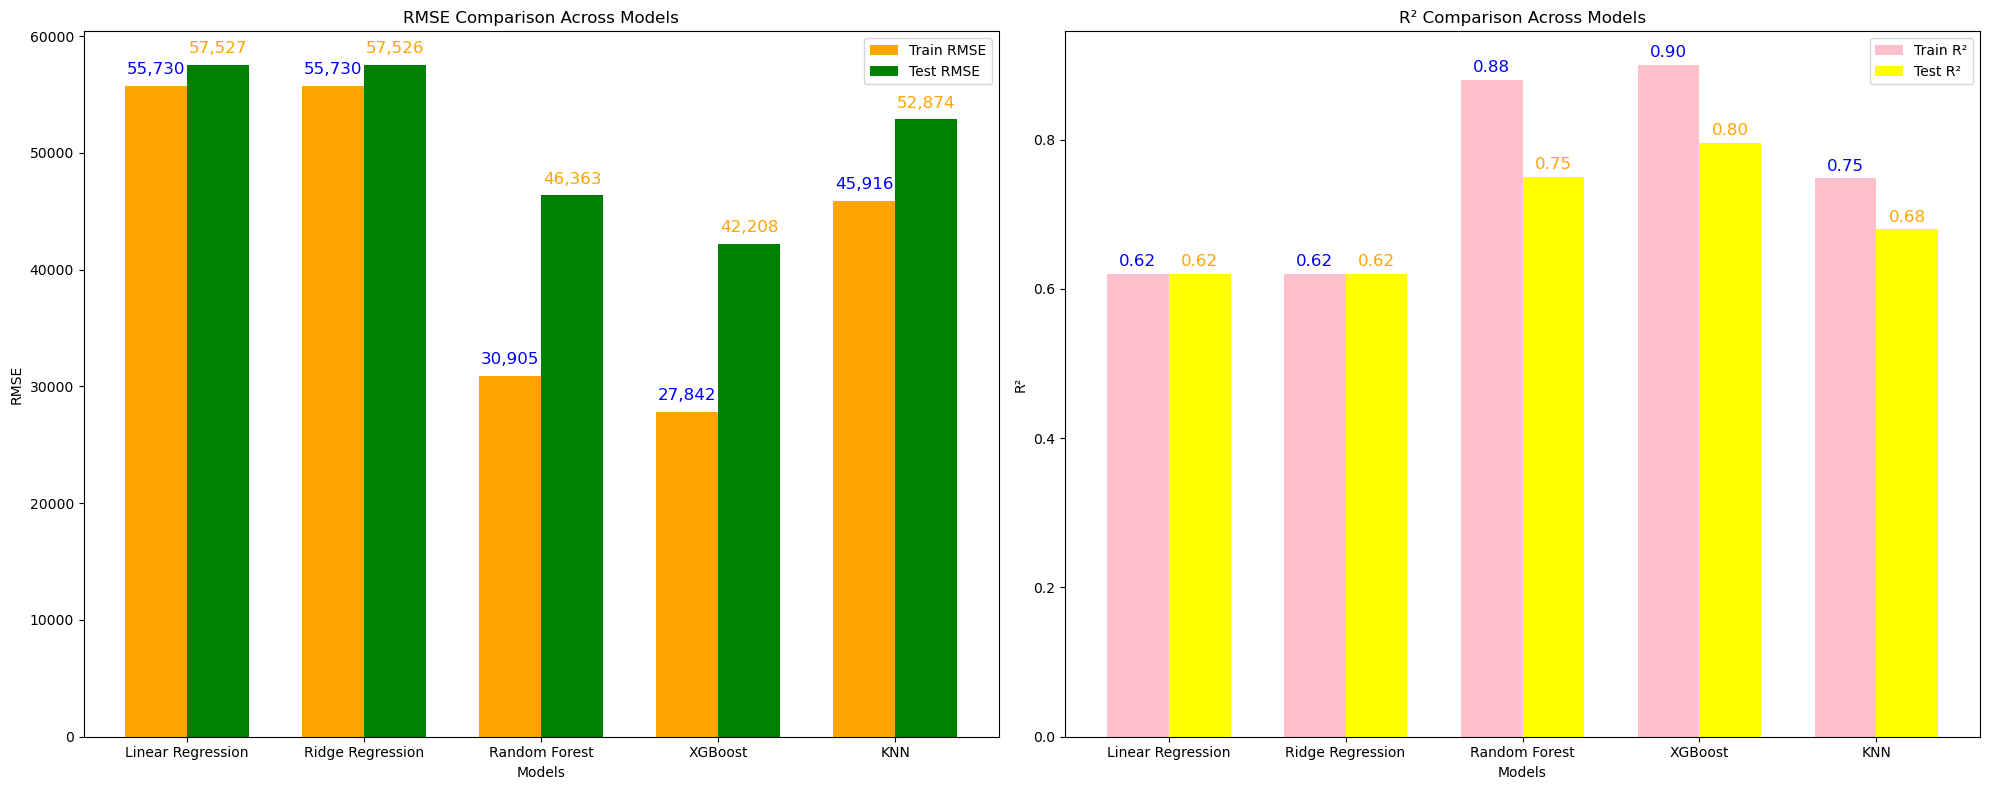

In [177]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))


bar_width = 0.35
index = np.arange(len(model_names))

# Plotting RMSE
axs[0].bar(index, train_rmse, bar_width, label='Train RMSE', color='orange')
axs[0].bar(index + bar_width, test_rmse, bar_width, label='Test RMSE', color='green')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('RMSE')
axs[0].set_title('RMSE Comparison Across Models')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(model_names)
axs[0].legend()


for i in range(len(model_names)):
    axs[0].text(i, train_rmse[i] + 1000, f'{train_rmse[i]:,.0f}', ha='center', color='b', fontsize=12)
    axs[0].text(i + bar_width, test_rmse[i] + 1000, f'{test_rmse[i]:,.0f}', ha='center', color='orange', fontsize=12)
    
    
    #Plotting R²
axs[1].bar(index, train_r2, bar_width, label='Train R²', color='pink')
axs[1].bar(index + bar_width, test_r2, bar_width, label='Test R²', color='yellow')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('R²')
axs[1].set_title('R² Comparison Across Models')
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(model_names)
axs[1].legend()

# Visualizing the R² values on bars
for i in range(len(model_names)):
    axs[1].text(i, train_r2[i] + 0.01, f'{train_r2[i]:.2f}', ha='center', color='b', fontsize=12)
    axs[1].text(i + bar_width, test_r2[i] + 0.01, f'{test_r2[i]:.2f}', ha='center', color='orange', fontsize=12)

plt.tight_layout()
plt.show()

#### These two bar charts compare the performance of five different regression models (Linear Regression, Ridge Regression, Random Forest, XGboost, and KNN) using the metrics RMSE and R² for both training and testing dataset.

## Conclusion:

* XGBoost: Based on its performance in terms of both RMSE and R-squared metrics, it appears to be performing better than any other model, indicating that it can generalize well with new data or unseen data sets.
* Random Forest: These models seem not effective since their performances on training data differ significantly from their testing data the random forest had high error rates while ada boost was more accurate.
* Linear Regression and Ridge Regression: They do not fit the data based on the relatively high root mean square errors(RMSEs) * plus low adjusted coefficients of determination(R-squareds).

# Boston Data

## Attribute Information:- Kaggle
                
Input features in order:
    
1) CRIM: per capita crime rate by town.

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town.

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M].

6) RM: average number of rooms per dwelling.

7) AGE: proportion of owner-occupied units built prior to 1940.

8) DIS: weighted distances to five Boston employment centres.

9) RAD: index of accessibility to radial highways.

10) TAX: full-value property-tax rate per $10,000 [$/10k].

11) PTRATIO: pupil-teacher ratio by town.

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

13) LSTAT: % lower status of the population

Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$].

Source
StatLib - Carnegie Mellon 

Dataset link: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

In [178]:
df1 = pd.read_csv(r"/Users/shahbaz/Documents/Dissertation/HPP/boston.csv")

In [179]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [180]:
df1.shape

(506, 14)

In [181]:
# checking data types of all columns

print(df1.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [182]:
# checking NA values
df1.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no missing values.

In [183]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1.  mean value In TAX and B are High compared other columns.

2.  Some column are skewed like CRIM , ZN, INDUS , AGE, RAD, TAX, B.

3.  some columns follow normal Dist like, NOX, RM , DIS, PTRATIO , LSTAT , MEDV.

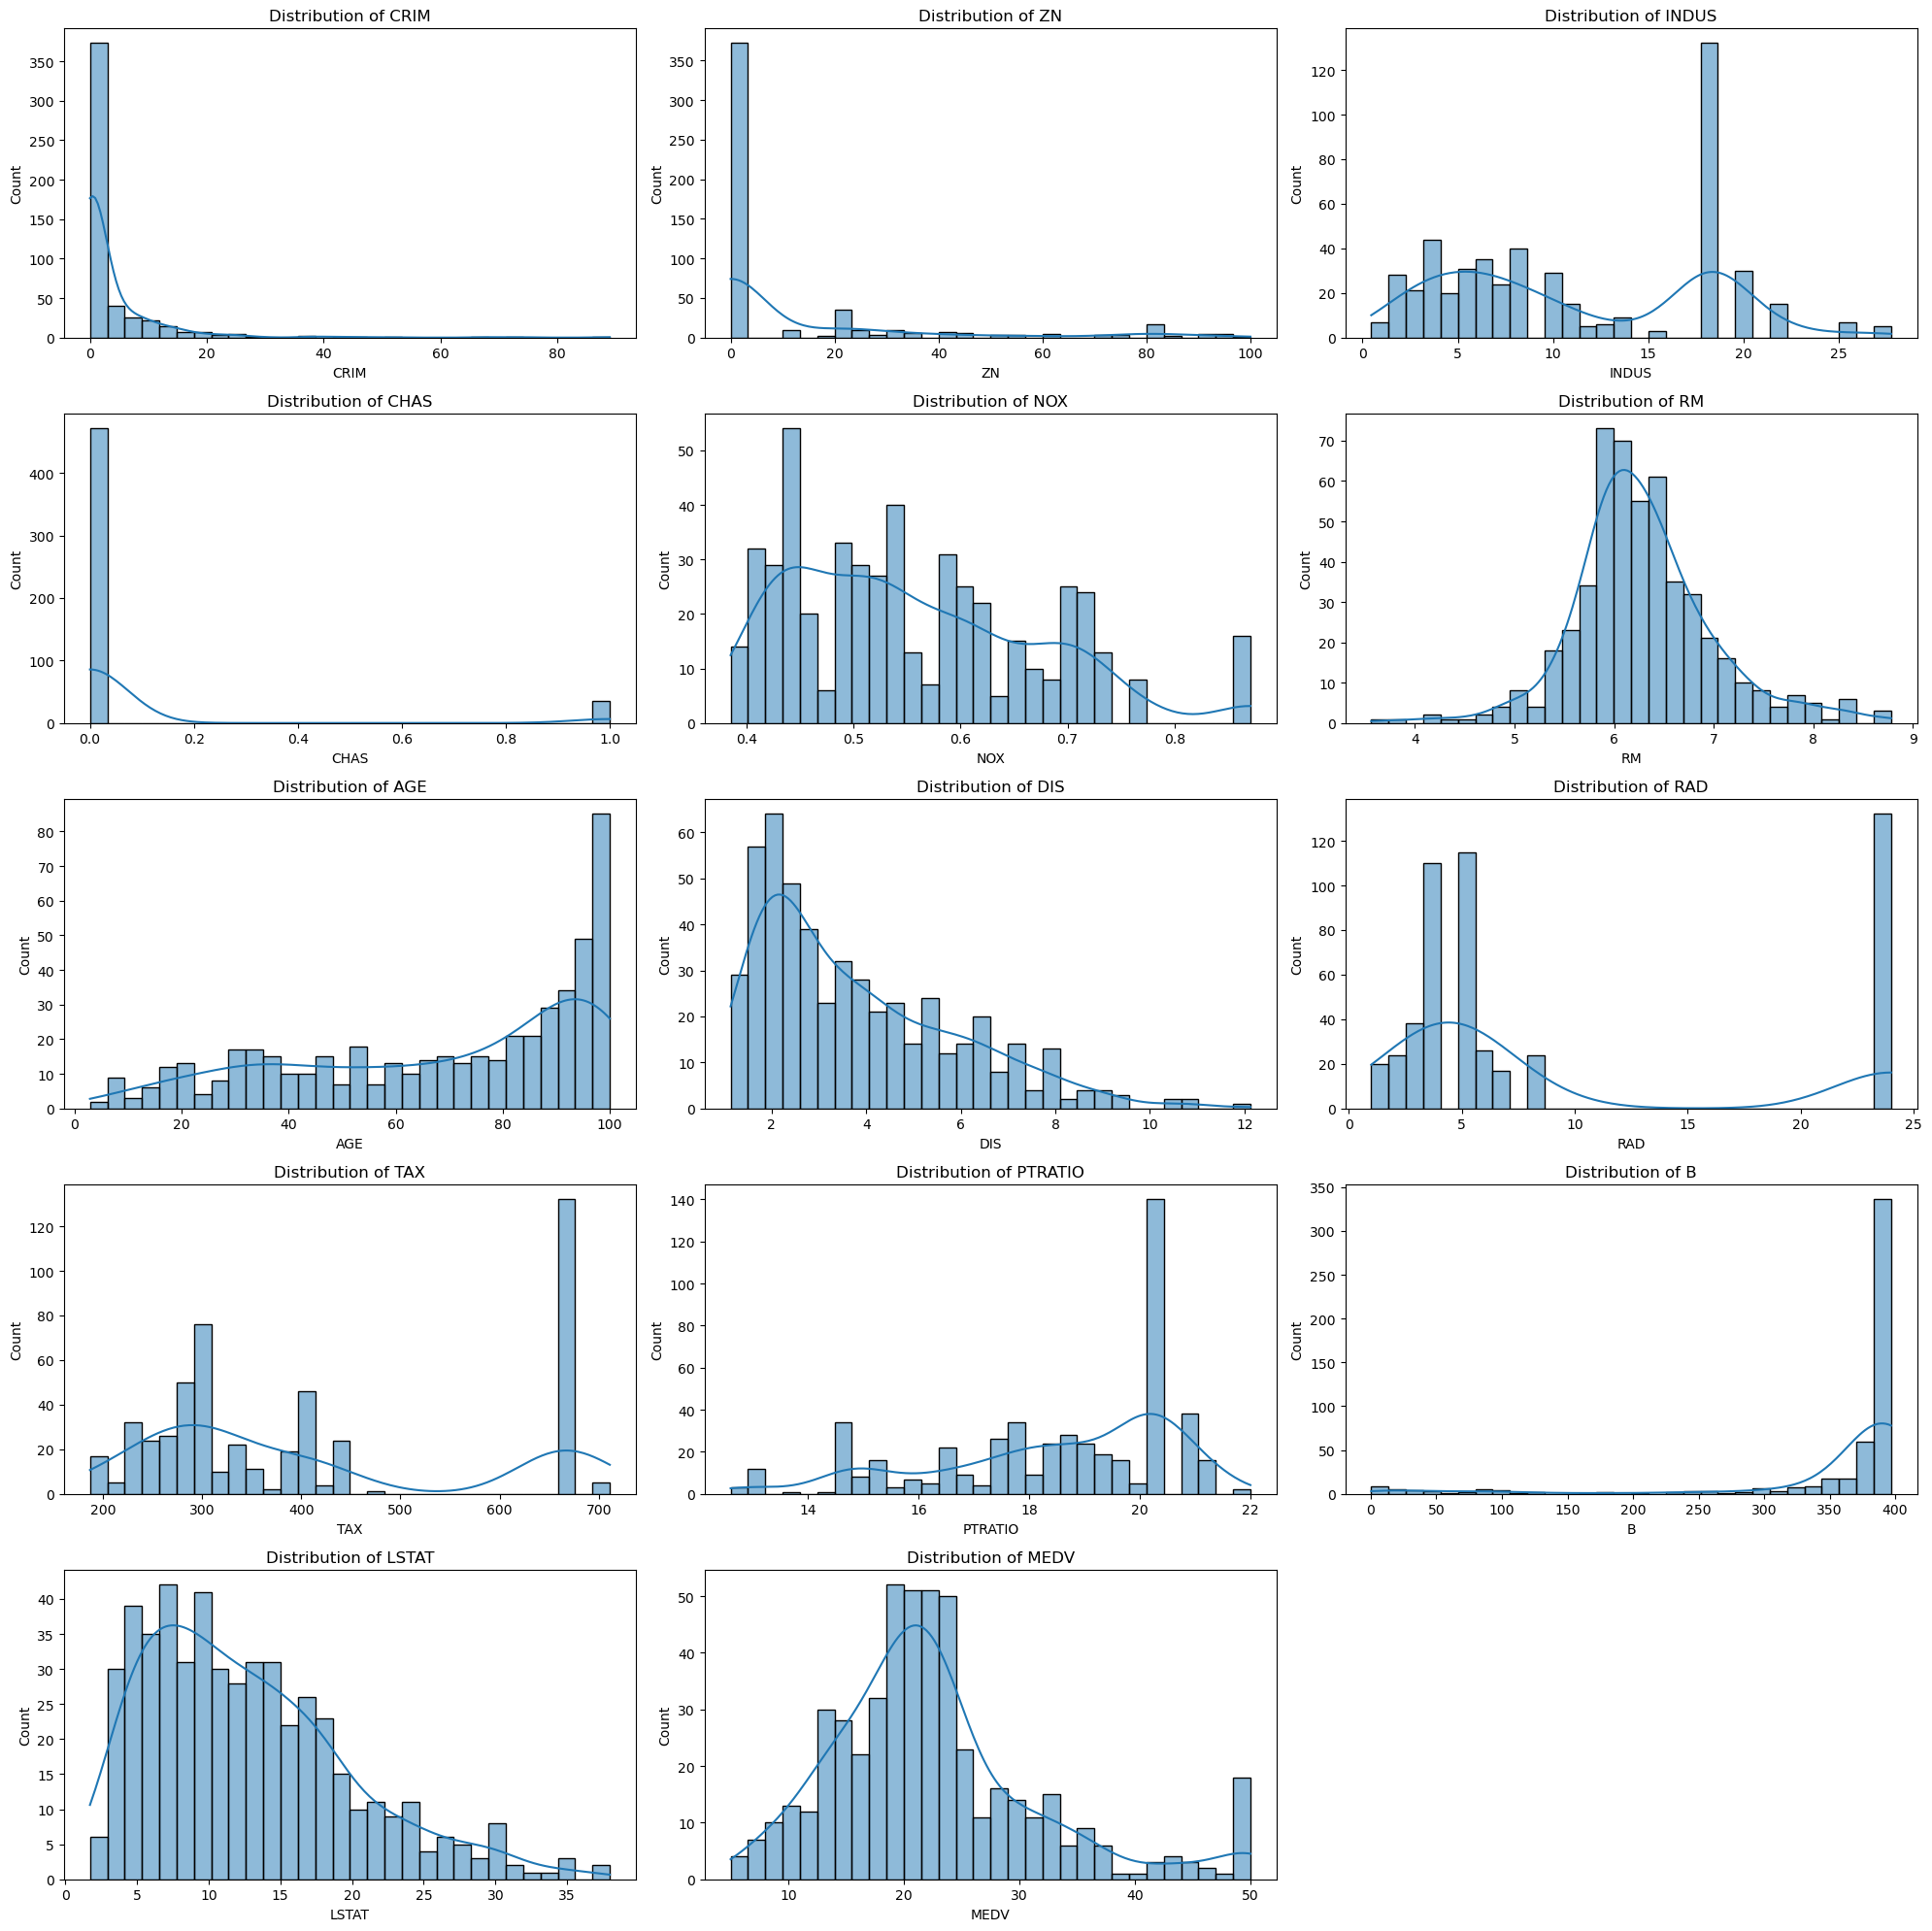

In [184]:
plt.figure(figsize=(20, 20)) 
df1_numeric = df1.select_dtypes(include=['float64', 'int64']) 

for i, column in enumerate(df1_numeric.columns, 1):
    plt.subplot(len(df1_numeric.columns) // 3 + 1, 3, i)  
    sns.histplot(df1[column], kde=True, bins=30) 
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

CRIM: we can see strong right skewed dist which suggests most areas have low crime rates but few areas have high crime rates.

ZN: highly right-skewed which means most areas have no residental zoning.

INDUS: here we can see bimodal dist with right-skewed.
    
CHAS: most of the areas are not located near Charles river.

NOX: slightly right skewed, shows that pollution is generally moderate.

RM: Normally distributed with most homes having 6,7 rooms.

AGE: Bimodal dist indicated a mix of old and newer homes.

DIS: right skewed which suggests most homes are near to employment centers.

RAD: highly skewed to the right with most areas having low accessibility.

TAX: most areas have low tax rates.

PTRATIO: most of the areas are clustered around a ratio of 18-20.

B: A high peak around 340 indicates most areas have a similar proportion

LSTAT: right skewed

MEDV: normally distributed

### some columns are highly skewed, so we will use log transformation to handle skewness.

In [185]:
columns_to_transform = ['CRIM', 'ZN', 'INDUS', 'DIS', 'RAD', 'TAX', 'LSTAT']

df1[columns_to_transform] = df1[columns_to_transform].apply(np.log1p)

## boxplot

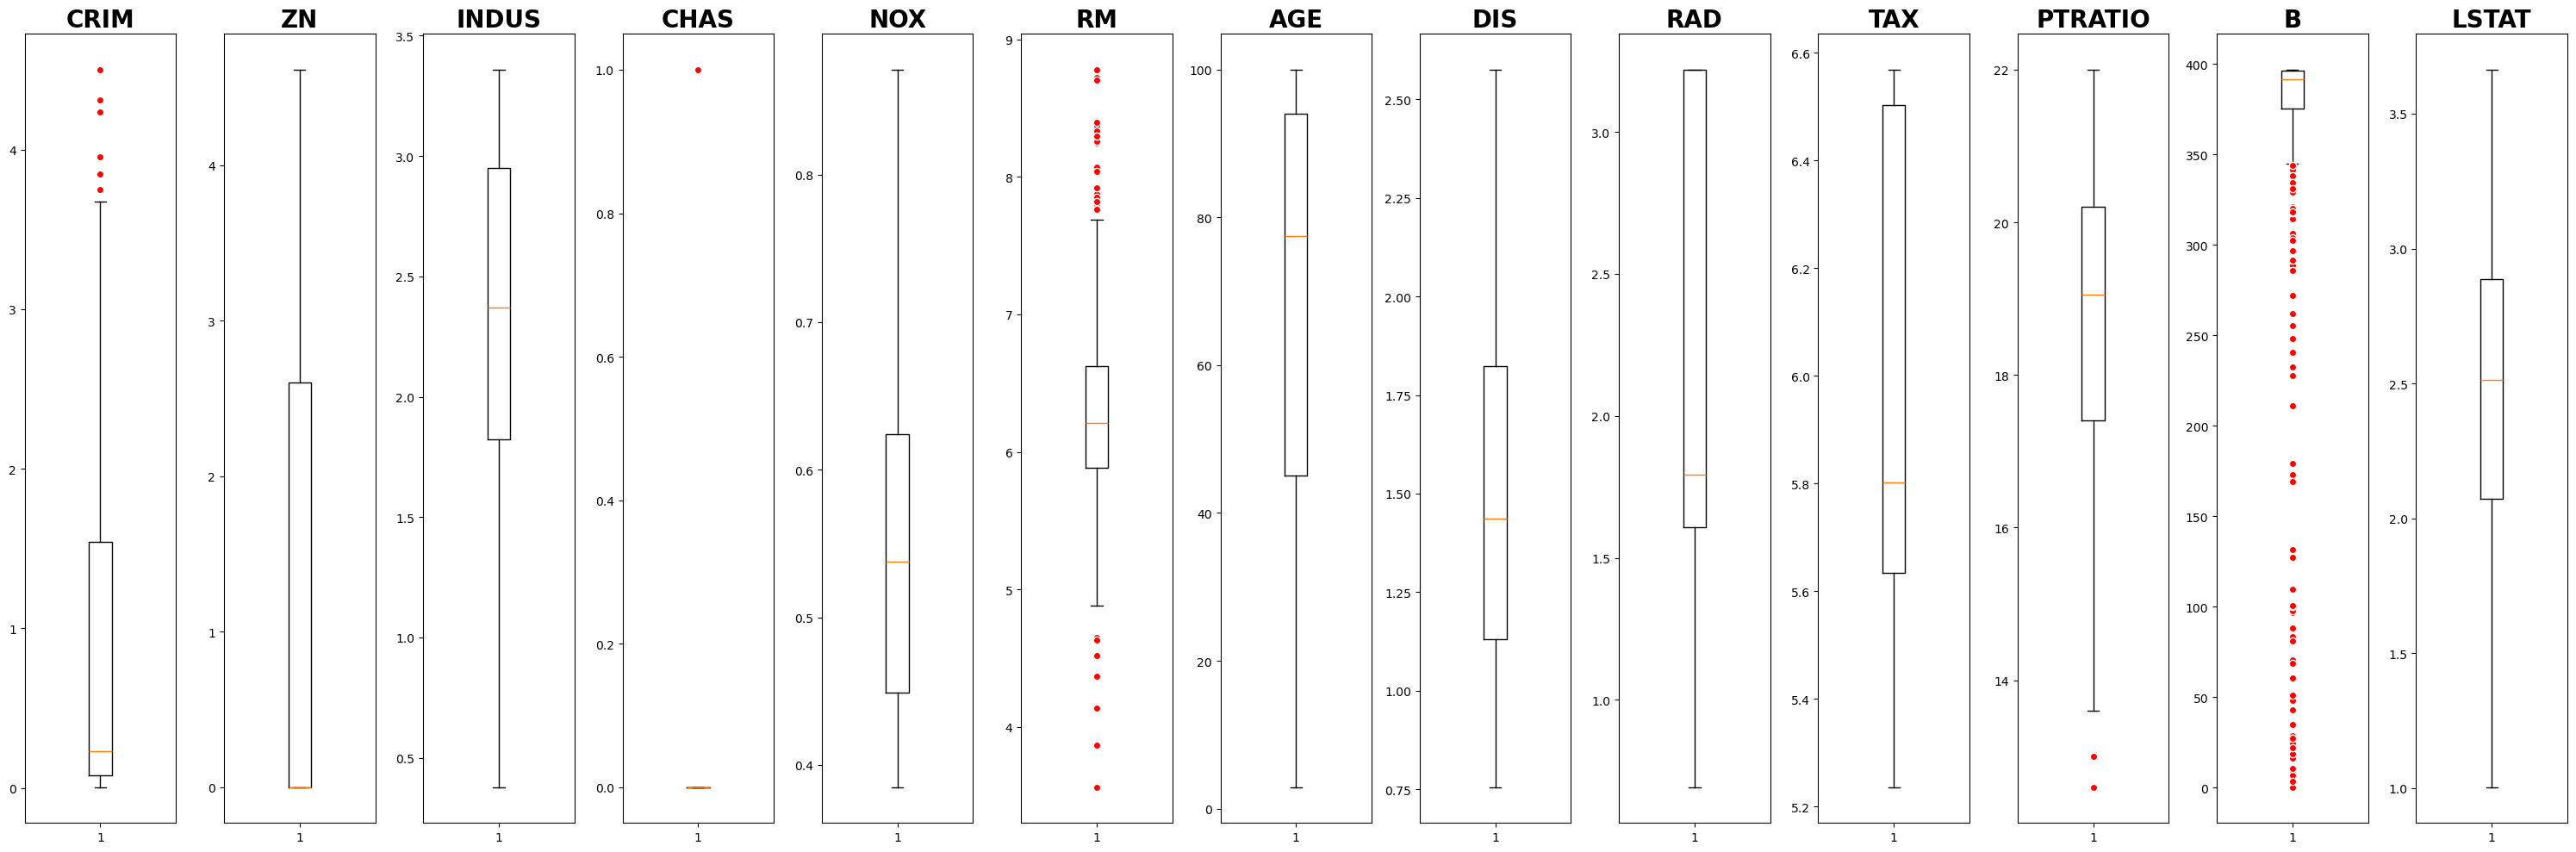

In [186]:
selected_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
df_selected = df1[selected_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(ncols=len(selected_columns), nrows=1, figsize=(30, 10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_selected.iloc[:, i], flierprops=red_circle)
    ax.set_title(df_selected.columns[i], fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

we are not removing outliers they might be important values in data.

## Correlation Matrix

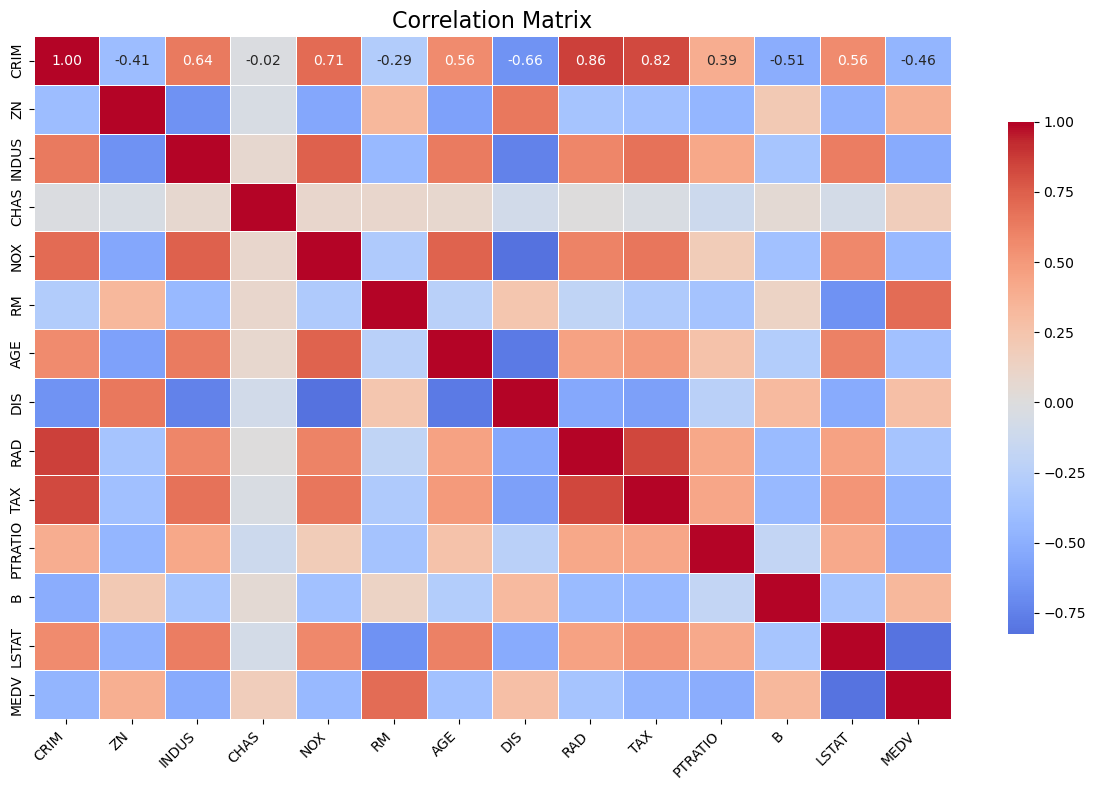

In [187]:
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Highly correlated variables with Target variable "MEDV":

LSTAT: strong negative correlation(-0.74) with MEDV is associated withe lower housing prices.

RM: Strong positive correlation of 0.70

PTRATION: Moderate -ve correlation of -0.51

## TRAIN & TEST SPLIT

In [188]:
X1 = df1.drop('MEDV', axis=1)  
y1 = df1['MEDV']  # Target varible

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

## Linear Regression

In [189]:
model = LinearRegression()
model.fit(X_train_scaled1, y_train)

y_train_pred = model.predict(X_train_scaled1)
y_test_pred = model.predict(X_test_scaled1)

# MSE, RMSE, and R² for both training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# printing results
print('for training data')
print(f'Training MSE: {train_mse:.4f}')
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Training R²: {train_r2:.4f}')
print(' ')
print('for test data')
print(f'Test MSE: {test_mse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test R²: {test_r2:.4f}')

for training data
Training MSE: 17.2876
Training RMSE: 4.1578
Training R²: 0.8010
 
for test data
Test MSE: 18.5789
Test RMSE: 4.3103
Test R²: 0.7467


## Ridge Regression

In [190]:
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength)
ridge_model.fit(X_train_scaled1, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled1)
y_test_pred_ridge = ridge_model.predict(X_test_scaled1)

#  MSE, RMSE, and R² for both training and test sets 
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Step 6: Print the results for Ridge Regression
print(f'Ridge Regression Training MSE: {train_mse_ridge:.4f}')
print(f'Ridge Regression Training RMSE: {train_rmse_ridge:.4f}')
print(f'Ridge Regression Training R²: {train_r2_ridge:.4f}')
print(" ")
print(f'Ridge Regression Test MSE: {test_mse_ridge:.4f}')
print(f'Ridge Regression Test RMSE: {test_rmse_ridge:.4f}')
print(f'Ridge Regression Test R²: {test_r2_ridge:.4f}')


Ridge Regression Training MSE: 17.2888
Ridge Regression Training RMSE: 4.1580
Ridge Regression Training R²: 0.8010
 
Ridge Regression Test MSE: 18.5941
Ridge Regression Test RMSE: 4.3121
Ridge Regression Test R²: 0.7464


## Random Forest

In [191]:
# Random Forest Regression model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees
rf_model.fit(X_train_scaled1, y_train)

y_train_pred_rf = rf_model.predict(X_train_scaled1)
y_test_pred_rf = rf_model.predict(X_test_scaled1)

# MSE, RMSE, and R² for both training and test sets (Random Forest Regression)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)


print(f'Random Forest Regression Training MSE: {train_mse_rf:.4f}')
print(f'Random Forest Regression Training RMSE: {train_rmse_rf:.4f}')
print(f'Random Forest Regression Training R²: {train_r2_rf:.4f}')
print(" ")
print(f'Random Forest Regression Test MSE: {test_mse_rf:.4f}')
print(f'Random Forest Regression Test RMSE: {test_rmse_rf:.4f}')
print(f'Random Forest Regression Test R²: {test_r2_rf:.4f}')

Random Forest Regression Training MSE: 1.9810
Random Forest Regression Training RMSE: 1.4075
Random Forest Regression Training R²: 0.9772
 
Random Forest Regression Test MSE: 8.1351
Random Forest Regression Test RMSE: 2.8522
Random Forest Regression Test R²: 0.8891


## hyperparameter tuning for random forest

In [192]:
param_grid = {
    'n_estimators': [200,300,400],  
    'max_depth': [5,10],  
    'min_samples_split': [5, 10,15],  
    'min_samples_leaf': [2, 4,6],
    'max_features': ['auto', 'sqrt']
}


rf_model = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=10, scoring='neg_mean_squared_error', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled1, y_train)


best_params = random_search.best_params_
print(f'Best parameters from RandomizedSearchCV: {best_params}')

best_rf_model = random_search.best_estimator_

y_train_pred_rf_best = best_rf_model.predict(X_train_scaled1)
y_test_pred_rf_best = best_rf_model.predict(X_test_scaled1)

train_mse_rf_best = mean_squared_error(y_train, y_train_pred_rf_best)
train_rmse_rf_best = np.sqrt(train_mse_rf_best)
train_r2_rf_best = r2_score(y_train, y_train_pred_rf_best)
test_mse_rf_best = mean_squared_error(y_test, y_test_pred_rf_best)
test_rmse_rf_best = np.sqrt(test_mse_rf_best)
test_r2_rf_best = r2_score(y_test, y_test_pred_rf_best)

print(f'Best Random Forest Regression Training MSE: {train_mse_rf_best:.4f}')
print(f'Best Random Forest Regression Training RMSE: {train_rmse_rf_best:.4f}')
print(f'Best Random Forest Regression Training R²: {train_r2_rf_best:.4f}')
print(" ")
print(f'Best Random Forest Regression Test MSE: {test_mse_rf_best:.4f}')
print(f'Best Random Forest Regression Test RMSE: {test_rmse_rf_best:.4f}')
print(f'Best Random Forest Regression Test R²: {test_r2_rf_best:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=400; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_feature

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=auto,

## XGB Regressor

In [193]:

xgb_model = XGBRegressor(random_state=42, reg_alpha=0.9, reg_lambda=0.5)
xgb_model.fit(X_train_scaled1, y_train)

y_train_pred_xgb = xgb_model.predict(X_train_scaled1)
y_test_pred_xgb = xgb_model.predict(X_test_scaled1)

# Calculate MSE, RMSE, and R² for both training and test sets
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_rmse_xgb = np.sqrt(train_mse_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(test_mse_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f'XGBoost Regression Training MSE: {train_mse_xgb:.4f}')
print(f'XGBoost Regression Training RMSE: {train_rmse_xgb:.4f}')
print(f'XGBoost Regression Training R²: {train_r2_xgb:.4f}')
print(" ")
print(f'XGBoost Regression Test MSE: {test_mse_xgb:.4f}')
print(f'XGBoost Regression Test RMSE: {test_rmse_xgb:.4f}')
print(f'XGBoost Regression Test R²: {test_r2_xgb:.4f}')


XGBoost Regression Training MSE: 0.0208
XGBoost Regression Training RMSE: 0.1444
XGBoost Regression Training R²: 0.9998
 
XGBoost Regression Test MSE: 7.1414
XGBoost Regression Test RMSE: 2.6723
XGBoost Regression Test R²: 0.9026


XGB Model is performing good so we will not do hyperparameter tuning

## KNN

In [194]:
param_grid_knn = {
    'n_neighbors': [3,5],  
    'weights': ['uniform', 'distance'],  
    'p': [2] 
}

knn_model = KNeighborsRegressor()

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, 
                                scoring='neg_mean_squared_error', cv=5, 
                                verbose=2, n_jobs=-1)

grid_search_knn.fit(X_train_scaled1, y_train)

# Best parameters from GridSearchCV
best_params_knn = grid_search_knn.best_params_
print(f'Best parameters from GridSearchCV: {best_params_knn}')

best_knn_model = grid_search_knn.best_estimator_

# predictions using the best KNN model
y_train_pred_knn_best = best_knn_model.predict(X_train_scaled1)
y_test_pred_knn_best = best_knn_model.predict(X_test_scaled1)

# Calculate MSE, RMSE, and R² for both training and test sets (Best KNN Model)
train_mse_knn_best = mean_squared_error(y_train, y_train_pred_knn_best)
train_rmse_knn_best = np.sqrt(train_mse_knn_best)
train_r2_knn_best = r2_score(y_train, y_train_pred_knn_best)

test_mse_knn_best = mean_squared_error(y_test, y_test_pred_knn_best)
test_rmse_knn_best = np.sqrt(test_mse_knn_best)
test_r2_knn_best = r2_score(y_test, y_test_pred_knn_best)

print(f'Best KNN Regression Training MSE: {train_mse_knn_best:.4f}')
print(f'Best KNN Regression Training RMSE: {train_rmse_knn_best:.4f}')
print(f'Best KNN Regression Training R²: {train_r2_knn_best:.4f}')
print(" ")
print(f'Best KNN Regression Test MSE: {test_mse_knn_best:.4f}')
print(f'Best KNN Regression Test RMSE: {test_rmse_knn_best:.4f}')
print(f'Best KNN Regression Test R²: {test_r2_knn_best:.4f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=5, p=2, weig

kNN is overfitting

## Model comparison

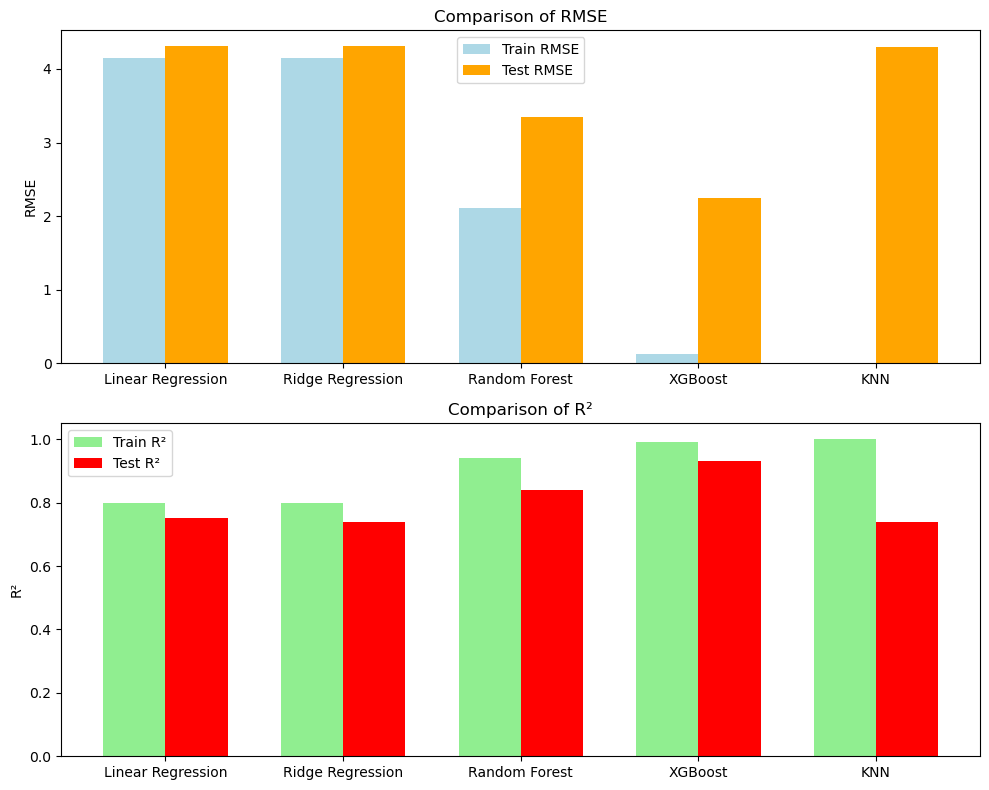

In [195]:
model_names1 = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'KNN']

# Data
train_rmse = [4.15, 4.15, 2.11, 0.13, 0]
test_rmse = [4.31, 4.31, 3.35, 2.24, 4.3]
train_r2 = [0.8, 0.8, 0.94, 0.99, 1.0]
test_r2 = [0.75, 0.74, 0.84, 0.93, 0.74]

x = np.arange(len(model_names1))
width = 0.35  # the width of the bars

#subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

#Plotting RMSE
ax[0].bar(x - width/2, train_rmse, width, label='Train RMSE', color='lightblue')
ax[0].bar(x + width/2, test_rmse, width, label='Test RMSE', color='orange')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Comparison of RMSE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names1)
ax[0].legend()

#Plotting R²
ax[1].bar(x - width/2, train_r2, width, label='Train R²', color='lightgreen')
ax[1].bar(x + width/2, test_r2, width, label='Test R²', color='red')
ax[1].set_ylabel('R²')
ax[1].set_title('Comparison of R²')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names1)
ax[1].legend()

plt.tight_layout()
plt.show()
